In [ ]:
!pip uninstall opencv-python -y
!pip install opencv-contrib-python --force-reinstall

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!unzip Data.zip

**Haris corner detection**

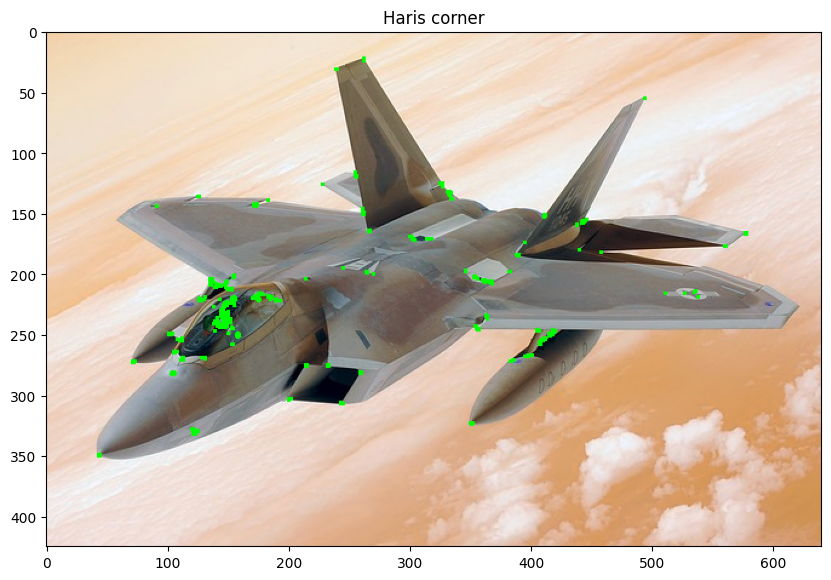

In [ ]:
img = cv2.imread('./Data/plane.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = np.float32(gray_img)

dst = cv2.cornerHarris(gray_img, blockSize=2, ksize=3, k=0.04)

# Dilate to mark the corners
dst = cv2.dilate(dst, None)
img[dst > 0.01 * dst.max()] = [0, 255, 0]

figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(img)
plt.title("Haris corner")
plt.show()

**Shi-Tomasi corner detection :**

On l'appelle également "Good Features". Il s'agit d'une évolution du détecteur de coins Haris qui propose une fonction de notation différente de celle utilisée dans Haris pour trouver les N coins les plus forts d'une image.

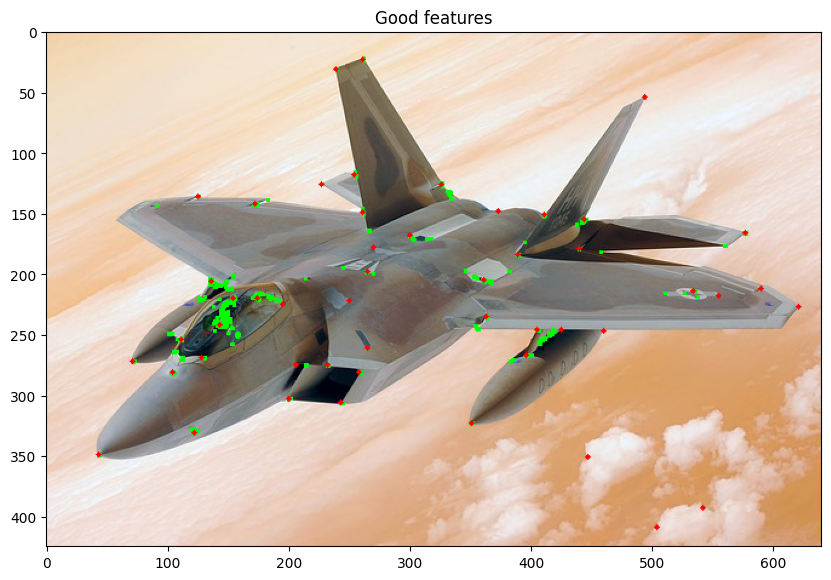

In [ ]:
corners = cv2.goodFeaturesToTrack(gray_img, maxCorners=50, qualityLevel=0.02, minDistance=20)
corners = np.float32(corners)

for item in corners:
    x, y = map(int, item[0])
    cv2.circle(img, (x, y), 2, (255, 0, 0), -1)

figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(img)
plt.title("Good features")
plt.show()

**SIFT (Scale-Invariant Feature Transform) :**

SIFT est à la fois invariant en termes de rotation et d'échelle. Il fournit des points clés et des descripteurs de points clés où le descripteur de points clés décrit le point clé à une échelle et une rotation sélectionnées avec les gradients de l'image. Nous affichons SIFT avec des cercles représentant les points clés/caractéristiques, où la taille du cercle représente la force du point clé et la ligne à l'intérieur du cercle indique l'orientation du point clé.




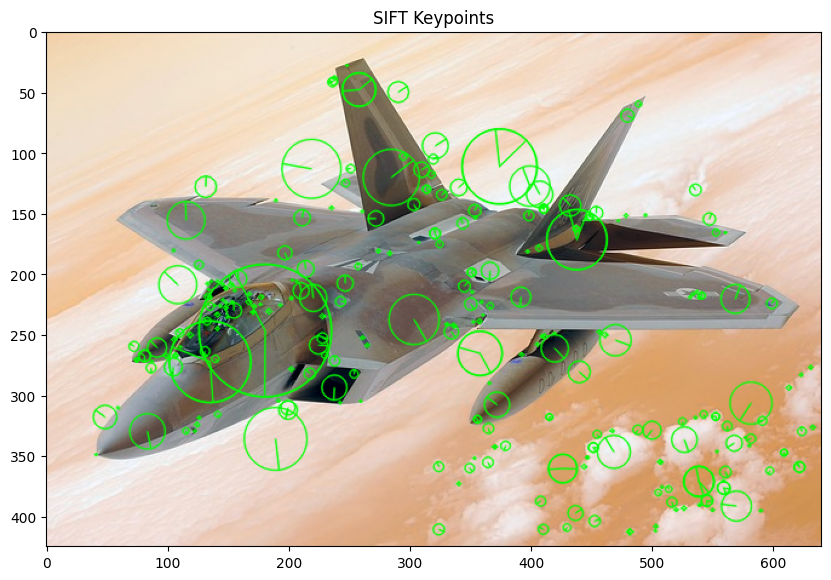

In [ ]:
img = cv2.imread('./Data/plane.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray_img, None)

kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0),  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(kp_img)
plt.title("SIFT Keypoints")
plt.show()

**FAST algorithm for corner detection :**

  L'algorithme FAST a été introduit pour réduire le temps de traitement. Cependant, FAST ne nous donne que les points clés et nous pouvons avoir besoin de calculer les descripteurs avec d'autres algorithmes comme SIFT et SURF.

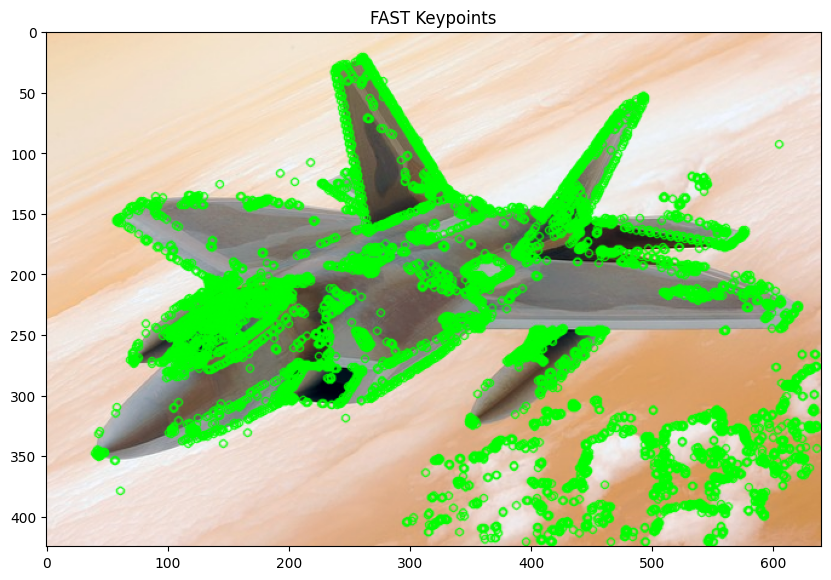

In [ ]:
img = cv2.imread('./Data/plane.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create()
fast.setNonmaxSuppression(False)

kp = fast.detect(gray_img, None)
kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0))
figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(kp_img)
plt.title("FAST Keypoints")
plt.show()

**ORB :**

 ORB est un détecteur open source alternatif à SIFT et SURF. Il utilise les techniques FAST et BRIEF pour détecter les points clés et calculer les descripteurs d'image respectivement.

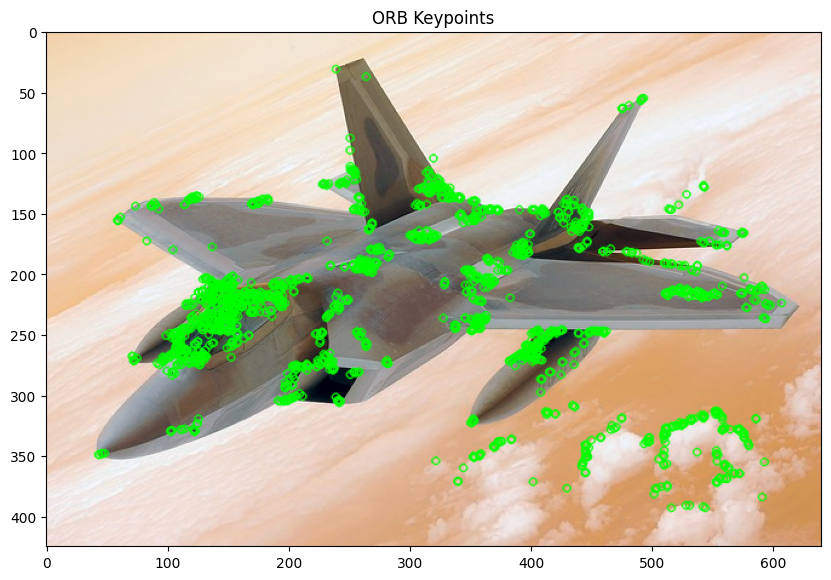

In [ ]:
img = cv2.imread('./Data/plane.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(nfeatures=2000)
kp, des = orb.detectAndCompute(gray_img, None)

kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)

figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(kp_img)
plt.title("ORB Keypoints")
plt.show()

**Feature matching: :**

 La correspondance des caractéristiques entre les images peut être réalisée à l'aide de :

- Brute-Force (BF) Matcher : il fait correspondre le descripteur d'une caractéristique d'une image avec toutes les autres caractéristiques d'une autre image et renvoie la correspondance en fonction de la distance. Il est lent car il vérifie la correspondance avec toutes les caractéristiques.

- Flannmatcher : Fast Library for Approximate Nearest Neighbors (FLANN) est optimisé pour trouver les correspondances avec la recherche, même avec de grands ensembles de données, d'où sa rapidité par rapport à Brute-Force matcher.

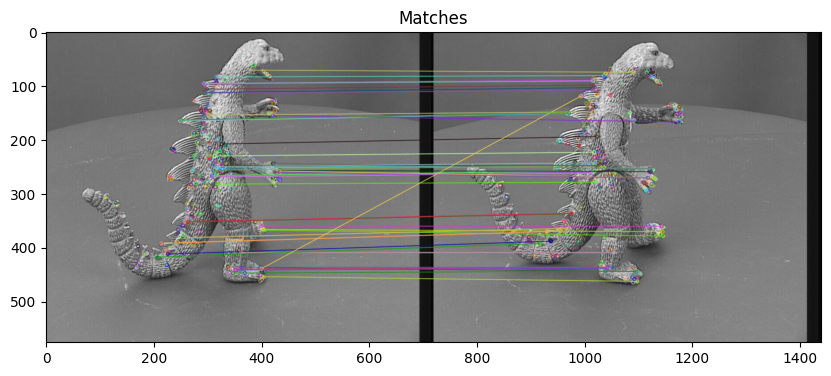

In [ ]:
img1 = cv2.imread('./Data/viff.001.ppm', 0)
img2 = cv2.imread('./Data/viff.003.ppm', 0)

orb = cv2.ORB_create(nfeatures=500)

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 50 matches
match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None)

figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(match_img)
plt.title("Matches")
plt.show()